In [5]:
import time
import torch
import torchvision.utils
from gaze_estimation import (GazeEstimationMethod, create_dataloader,
                             create_logger, create_loss, create_model,
                             create_optimizer, create_scheduler,
                             create_tensorboard_writer)
from gaze_estimation.utils import (AverageMeter, compute_angle_error,
                                   create_train_output_dir, load_config,
                                   save_config, set_seeds, setup_cudnn)
from gaze_estimation.config import get_default_config 
from gaze_estimation.datasets import create_dataset
from torch.utils.data import DataLoader

In [11]:
config = get_default_config()
config.merge_from_file('configs/mpiifacegaze/alexnet_train.yaml')
config.freeze()

In [13]:
train_dataset, val_dataset = create_dataset(config, True, [1,4,5,7,13])

In [19]:
train_dataset[0][0].shape

torch.Size([3, 448, 448])

In [5]:
train_dataset, val_dataset = create_dataset(config, True, [0,2,3,6,8,9,10,11,12,14])
train_loader = DataLoader(
    train_dataset,
    batch_size=config.train.batch_size,
    shuffle=True,
    num_workers=config.train.train_dataloader.num_workers,
    pin_memory=config.train.train_dataloader.pin_memory,
    drop_last=config.train.train_dataloader.drop_last,
)
val_loader = DataLoader(
    val_dataset,
    batch_size=config.train.batch_size,
    shuffle=False,
    num_workers=config.train.val_dataloader.num_workers,
    pin_memory=config.train.val_dataloader.pin_memory,
    drop_last=False,
)

In [ ]:
for img, pose, gaze in train_loader:
    

In [7]:
images, poses, gazes = next(iter(train_loader))

In [8]:
import matplotlib.pyplot as plt

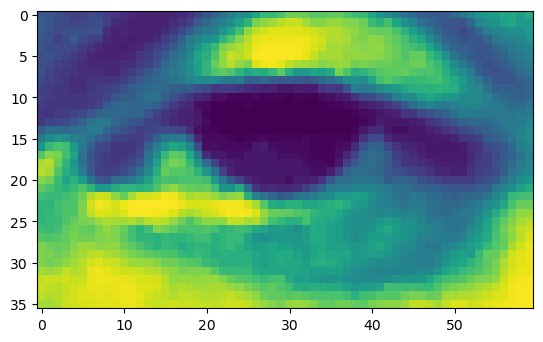

In [9]:
plt.imshow(images[0][0])